In [1]:
%run ./HC_model.ipynb

In [22]:
def tactile_discrimination_experiment_alter(time,p1,p2,b):
    dt = 0.4
    timesteps = int(time/dt)
    ZTs = np.zeros((Mt,Nt))
    ti = PHI_discrimination(0,p1,2.5,p2,2.5)
          
    qt = np.zeros((Mt,Nt,timesteps+1))
    ut = np.zeros((Mt,Nt,timesteps+1))
    zt = np.zeros((Mt,Nt,timesteps+1))
    pt = np.zeros((Mt,Nt,timesteps+1))

    for i in range(timesteps):    
        # Tactile activity
        ut[:,:,i+1] = ti+LIt(zt[:,:,i])
        qt[:,:,i+1] = qt[:,:,i] + (dt/tau)*(-qt[:,:,i]+ut[:,:,i])
        pt[:,:,i+1] = psit(qt[:,:,i],b)
        zt[:,:,i+1] = pt[:,:,i]*np.heaviside(pt[:,:,i],0)
        
    ZTs = zt[:,:,timesteps]    
    
    return ZTs

In [2]:
### Visuotactile experiment simulation setup 

# Distance points in cm (network coordinates) 
s_distances = np.asarray([2700,2200,1500,800,300])/1000
ts = np.linspace(s_distances[0],s_distances[-1],15)
v = 30 #cm/s 
mydistances = (120 - ts*v) # distance points in cm (network coordinates)

## Simulation setup
simtime = 100 #ms 

## Synapses setup
Wt,Wa,Bt,Ba = Fw(6.5,6.5,2.5,2.5) 
Lt,La = Lw(0.15,0.05,1,4,0.15,0.05,1,4)
bi = 0
pr = 0

In [13]:
Lt,La = Lw(0.15,0.05,1,4,0.15,0.05,1,4)
uRTs,uZMs,uZTs,uZAs = unisensory_experimentrun(mydistances,simtime,0,0)

Text(0.5, 0, 'Sound distance (cm)')

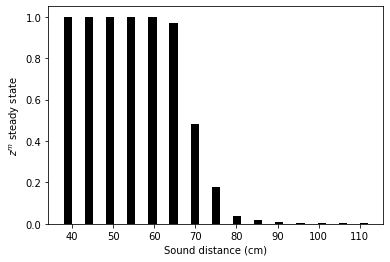

In [14]:
plt.figure(1)
plt.bar(mydistances,uZMs[-1,:],width=2,color='k');
plt.ylabel('$z^{m}$ steady state')
plt.xlabel('Sound distance (cm)')

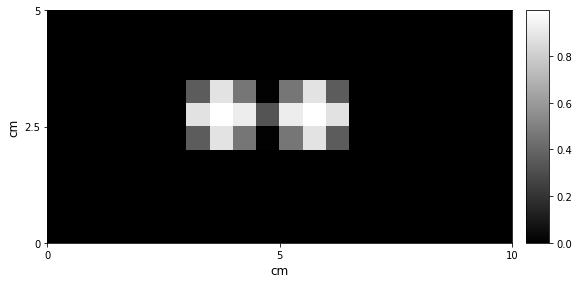

In [3]:
# Tactile stimuli
it_0 = 3.25 # 3.25 works. We increase it to compensate for the lack of multisensory input.

sigmat_i = 0.3

Lt,La = Lw(0.15,0.05,1,4,0.15,0.05,1,4)
p1 = 4
p2 = 6
hcZTs = tactile_discrimination_experiment(simtime,p1,p2,0)

fig, axs = plt.subplots(1, 1, figsize=(9, 9));
ax1 = plt.subplot(111)
im = ax1.imshow(hcZTs.transpose(),cmap='gray')
ax1.set_ylabel('cm',size=12)
ax1.set_xlabel('cm',size=12)
ax1.set_xticks(np.arange(-.5, 21, 10))
ax1.set_yticks(np.arange(-.5, 11, 5))
ax1.set_xticklabels([0,5,10])
ax1.set_yticklabels([0,2.5,5][::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
fig.colorbar(im, cax=cax)

#np.save('hc_discrimination.npy', hcZTs)

**SCZ**

In [9]:
Lt,La = Lw(0.99460344,0.05,1,4,0.99460344,0.05,1,4)
scz_uRTs,scz_uZMs,scz_uZTs,scz_uZAs = unisensory_experimentrun(mydistances,simtime,0,1.90670129)

Text(0.5, 0, 'Sound distance (cm)')

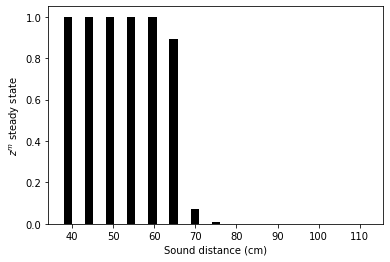

In [10]:
plt.figure(1)
plt.bar(mydistances,scz_uZMs[-1,:],width=2,color='k');
plt.ylabel('$z^{m}$ steady state')
plt.xlabel('Sound distance (cm)')

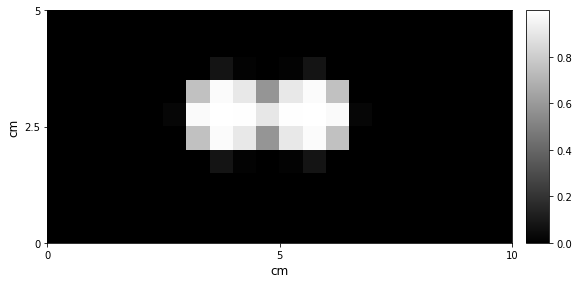

In [4]:
Lt,La = Lw(0.99460344,0.05,1,4,0.99460344,0.05,1,4)
p1 = 4
p2 = 6
sczZTs = tactile_discrimination_experiment(simtime,p1,p2,bi)

fig, axs = plt.subplots(1, 1, figsize=(9, 9));
ax1 = plt.subplot(111)
im = ax1.imshow(sczZTs.transpose(),cmap='gray')
ax1.set_ylabel('cm',size=12)
ax1.set_xlabel('cm',size=12)
ax1.set_xticks(np.arange(-.5, 21, 10))
ax1.set_yticks(np.arange(-.5, 11, 5))
ax1.set_xticklabels([0,5,10])
ax1.set_yticklabels([0,2.5,5][::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
fig.colorbar(im, cax=cax)

#np.save('scz_discrimination.npy', sczZTs)

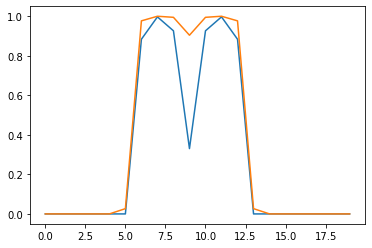

In [5]:
plt.plot(hcZTs[:,4])
plt.plot(sczZTs[:,4])

**H-SPQ**

In [11]:
Lt,La = Lw(1.25638267,0.05,1,4,1.25638267,0.05,1,4)
spq_uRTs,spq_uZMs,spq_uZTs,spq_uZAs = unisensory_experimentrun(mydistances,simtime,0,0)

Text(0.5, 0, 'Sound distance (cm)')

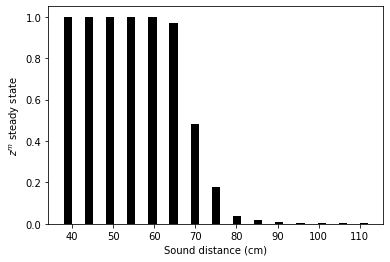

In [12]:
plt.figure(1)
plt.bar(mydistances,spq_uZMs[-1,:],width=2,color='k');
plt.ylabel('$z^{m}$ steady state')
plt.xlabel('Sound distance (cm)')

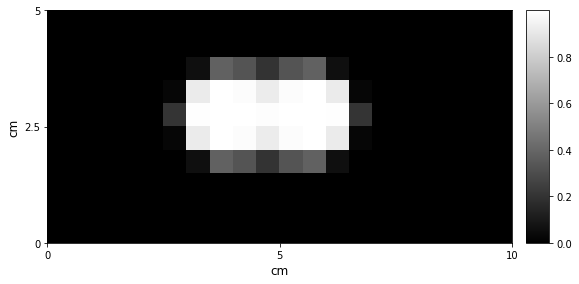

In [27]:
Lt,La = Lw(1.44787526,0.05,1,4,1.44787526,0.05,1,4)
p1 = 4
p2 = 6
spqZTs = tactile_discrimination_experiment(simtime,p1,p2,bi)

fig, axs = plt.subplots(1, 1, figsize=(9, 9));
ax1 = plt.subplot(111)
im = ax1.imshow(spqZTs.transpose(),cmap='gray')
ax1.set_ylabel('cm',size=12)
ax1.set_xlabel('cm',size=12)
ax1.set_xticks(np.arange(-.5, 21, 10))
ax1.set_yticks(np.arange(-.5, 11, 5))
ax1.set_xticklabels([0,5,10])
ax1.set_yticklabels([0,2.5,5][::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
fig.colorbar(im, cax=cax)

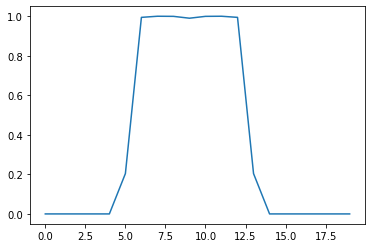

In [28]:
plt.plot(spqZTs[:,4])